# Fastai NLP Course Chapter 2
Created on: 01 Aout 2021

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
categories = ["alt.atheism", "talk.religion.misc", "comp.graphics", "sci.space"]
remove = ("headers", "footers", "quotes")
newsgroups_train = fetch_20newsgroups(subset="train", categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset="test", categories=categories, remove=remove)

newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [4]:
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

*perijove* is the point in the orbit of satellite of Jupiter nearest the planet's center. 

In [5]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [6]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [7]:
num_topics, num_top_words = 6, 8

### Stop words, stemming, lemmatization

**NLTK**

In [8]:
try:
    from sklearn.feature_extraction import stop_words
    sorted(list(stop_words.ENGLIST_STOP_WORDS))[:20]
except ImportError: 
    print("Stop words have been deprecated. ")

Stop words have been deprecated. 


In [9]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /home/nt-user/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [10]:
from nltk import stem

In [11]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

word_list = ["feet", "foot", "foots", "footing"]
[wnl.lemmatize(word) for word in word_list]

['foot', 'foot', 'foot', 'footing']

In [12]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

In [13]:
def lemmatize_word(word_list):
    print("Lemmatization: ", [wnl.lemmatize(word) for word in word_list])
    print("Stemming: ", [porter.stem(word) for word in word_list])

In [14]:
word_list = ["fly", "flies", "flying"]
lemmatize_word(word_list)

Lemmatization:  ['fly', 'fly', 'flying']
Stemming:  ['fli', 'fli', 'fli']


In [15]:
lemmatize_word(["organize", "organizes", "organizing"])

Lemmatization:  ['organize', 'organizes', 'organizing']
Stemming:  ['organ', 'organ', 'organ']


In [16]:
lemmatize_word(["universe", "university"])

Lemmatization:  ['universe', 'university']
Stemming:  ['univers', 'univers']


In [17]:
import spacy

In [18]:
# from spacy.lemmatizer import Lemmatizer
# lemmatizer = Lemmatizer()

nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.Defaults.create_lemmatizer()

In [19]:
[lemmatizer.lookup(word) for word in word_list]

['fly', 'flies', 'flying']

In [20]:
sorted([*nlp.Defaults.stop_words])[:20]

["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also']

In [21]:
# What stop words appear in spacy but not sklearn?
try: nlp.Defaults.stop_words - stop_words.ENGLISH_STOP_WORDS
except Exception as e: print(e)

name 'stop_words' is not defined


In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

In [23]:
vectorizer = CountVectorizer(stop_words='english')

vectors = vectorizer.fit_transform(newsgroups_train.data).todense()  # (documents, vocab)
vectors.shape

(2034, 26576)

In [25]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [26]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape

(26576,)

In [27]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

# Singular Value Decomposition (SVD)
Latent Semantic Analysis (LSA) uses SVD. Sometimes, we hear topic modelling referred to as LSA. 

In [28]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 11s, sys: 2min 10s, total: 3min 22s
Wall time: 2min 45s


In [29]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [30]:
# Confirm decomposition of input
s[:4]

array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

In [31]:
np.diag(np.diag(s[:4]))

array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

In [32]:
#Exercise: confirm that U, s, Vh is a decomposition of `vectors`

reconstructed_vectors = U @ np.diag(s) @ Vh  # takes very long to compute. Move to GPU would be better.
# np.linalg.norm(reconstructed_vectors - vectors)  # check for zero
np.allclose(reconstructed_vectors, vectors)  # alternatively, use this. 

True

In [36]:
# Exercise: confirm U and V are orthonormal
# so dot product of two are zero
U @ Vh == 0

# answer
np.allclose(U.T @ U, np.eye(U.shape[0]))
np.allclose(Vh @ Vh.T, np.eye(Vh.shape[0]))

True

What can we say about singular values s?

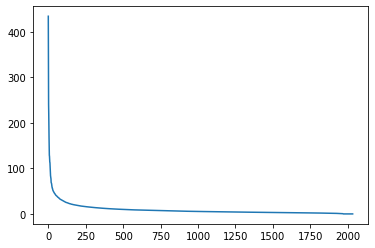

In [34]:
plt.plot(s)

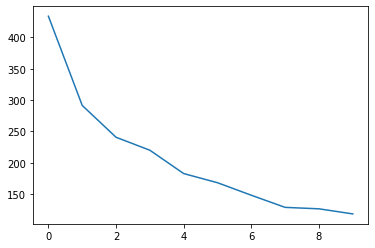

In [35]:
plt.plot(s[:10])

In [37]:
num_top_words = 8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)][:-num_top_words-1:-1]
    topic_words = ([top_words(t) for t in a])
    return [" ".join(t) for t in topic_words]

In [38]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

We get topics that match the kinds of clusters we would expect, despite the fact that this is an **unsupervised algorithm**. 

## Non-negative Matrix Factorization (NMF)

Usually we either use SVD or NMF. What does negative values means in lots of contexts. 

In [39]:
m, n = vectors.shape
d = 5  # num topics

clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

show_topics(H1)

/usr/local/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

### TD-IDF
Topic Frequency - Inverse Document Frequency is a way to normalize term counts by taking into account how often they appear in a document, how long the document is, and how common/rare the term is. 

$$ TF = \frac{\text{Number of occurrences of term t in document}}{\text{Number of words in documents}} $$  
$$ IDF = \log\bigg(\frac{\text{Number of documents}}{\text{Number of documents with term t in it}}\bigg) $$

In [40]:
vectorizer_tfidf = TfidfVectorizer(stop_words="english")
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)  # (documents, vocab)

newsgroups_train.data[10:20]

["a\n\nWhat about positional uncertainties in S-L 1993e?   I assume we know where\nand what Galileo is doing within a few meters.   But without the\nHGA,  don't we have to have some pretty good ideas, of where to look\nbefore imaging?  If the HGA was working,  they could slew around\nin near real time (Less speed of light delay).  But when they were\nimaging toutatis????  didn't someone have to get lucky on a guess to\nfind the first images?   \n\nAlso, I imagine S-L 1993e will be mostly a visual image.  so how will\nthat affect the other imaging missions.  with the LGA,  there is a real\ntight allocation of bandwidth.   It may be premature to hope for answers,\nbut I thought i'd throw it on the floor.",
 "I would like to program Tseng ET4000 to nonstandard 1024x768 mode by\nswitching to standard 1024x768 mode using BIOS and than changing some\ntiming details (0x3D4 registers 0x00-0x1F) but I don't know how to\nselect 36 MHz pixel clock I need. The BIOS function selects 40 MHz.\n\nIs t

In [41]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

show_topics(H1)

/usr/local/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

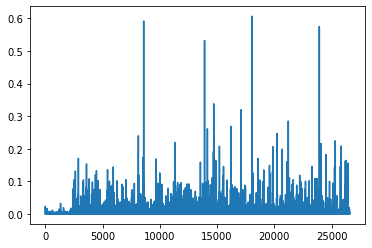

In [42]:
plt.plot(clf.components_[0])

In [43]:
clf.reconstruction_err_

43.712926057952785

SVD is unique decomposition, NMF **is not**. 

## Truncated SVD

In [48]:
%time u, s, v = np.linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 4s, sys: 24.5 s, total: 1min 29s
Wall time: 1min 4s


In [47]:
from sklearn import decomposition
import fbpca

In [49]:
%time u, s, v = decomposition.randomized_svd(vectors, 10)

CPU times: user 11.9 s, sys: 31.7 s, total: 43.6 s
Wall time: 58.2 s


Using fbpca

In [50]:
%time u, s, v = fbpca.pca(vectors, 10)

CPU times: user 1.81 s, sys: 1.14 s, total: 2.94 s
Wall time: 1.84 s


# 2b: Odds and Ends

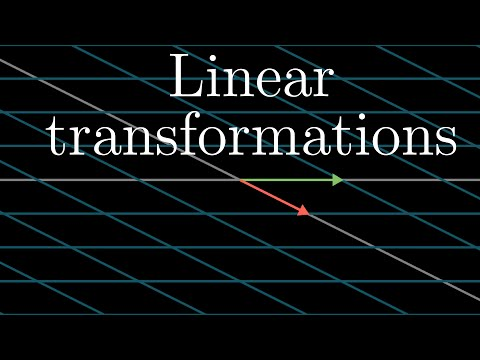

In [51]:
from IPython.display import YouTubeVideo
YouTubeVideo("kYB8IZa5AuE")

In [3]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import decomposition
from glob import glob
import os

In [4]:
filenames = []
for folder in ["british-fiction-corpus"]:  # "french-plays", "hugo-les-misérables"
    filenames.extend(glob(folder + "/*.txt"))
    
len(filenames)

27

In [5]:
vectorizer = TfidfVectorizer(input="filename", stop_words="english")
dtm = vectorizer.fit_transform(filenames).toarray()
vocab = np.array(vectorizer.get_feature_names())
dtm.shape, len(vocab)

((27, 55035), 55035)

In [6]:
from pathlib import Path
filenames = [Path(f) for f in filenames]

[f.name for f in filenames]

['Thackeray_Vanity.txt',
 'Eliot_Middlemarch.txt',
 'Fielding_Tom.txt',
 'Eliot_Adam.txt',
 'CBronte_Jane.txt',
 'Fielding_Joseph.txt',
 'ABronte_Agnes.txt',
 'Richardson_Clarissa.txt',
 'CBronte_Professor.txt',
 'Austen_Pride.txt',
 'Sterne_Tristram.txt',
 'Austen_Emma.txt',
 'Trollope_Phineas.txt',
 'EBronte_Wuthering.txt',
 'Thackeray_Pendennis.txt',
 'Dickens_Hard.txt',
 'Richardson_Pamela.txt',
 'Dickens_David.txt',
 'Thackeray_Barry.txt',
 'Trollope_Barchester.txt',
 'ABronte_Tenant.txt',
 'Dickens_Bleak.txt',
 'Sterne_Sentimental.txt',
 'Trollope_Prime.txt',
 'Eliot_Mill.txt',
 'Austen_Sense.txt',
 'CBronte_Villette.txt']

### NMF

In [11]:
clf = decomposition.NMF(n_components=10, random_state=1)

W1 = clf.fit_transform(dtm)
H1 = clf.components_

num_top_words = 8


def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]


def get_all_topic_words(H):
    top_indices = lambda t: {i for i in np.argsort(t)[:-num_top_words-1:-1]}
    topic_indices = [top_indices(t) for t in H]
    return sorted(set.union(*topic_indices))

/usr/local/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


In [12]:
ind = get_all_topic_words(H1)
vocab[ind]

array(['adams', 'allworthy', 'bounderby', 'brandon', 'catherine', 'cathy',
       'corporal', 'crawley', 'darcy', 'dashwood', 'did', 'earnshaw',
       'edgar', 'elinor', 'elizabeth', 'elton', 'emma', 'father',
       'ferrars', 'glegg', 'good', 'gradgrind', 'hareton', 'heathcliff',
       'jennings', 'jones', 'joseph', 'knightley', 'know', 'lady', 'like',
       'linton', 'little', 'll', 'lopez', 'louisa', 'lyndon', 'maggie',
       'man', 'marianne', 'miss', 'mr', 'mrs', 'old', 'osborne',
       'pendennis', 'philip', 'phineas', 'quoth', 'said', 'sissy',
       'sophia', 'sparsit', 'stephen', 'think', 'thought', 'time', 'tis',
       'toby', 'tom', 'trim', 'tulliver', 'uncle', 'wakem', 'weston',
       'willoughby'], dtype='<U31')

In [13]:
show_topics(H1)

['mr said phineas man lopez know mrs think',
 'said little like did time know good thought',
 'adams jones said allworthy lady sophia mr joseph',
 'mr darcy emma weston knightley miss elton elizabeth',
 'toby said uncle father corporal quoth tis trim',
 'elinor marianne dashwood jennings willoughby mrs brandon ferrars',
 'maggie tulliver said tom glegg philip mr wakem',
 'heathcliff linton hareton catherine earnshaw cathy edgar ll',
 'bounderby gradgrind sparsit said mr sissy louisa stephen',
 'said crawley lyndon pendennis old little osborne lady']

In [14]:
W1.shape, H1[:, ind].shape

((27, 10), (10, 66))

#### Export to CSVs

In [15]:
from IPython.display import FileLink, FileLinks

In [23]:
def savelink(filename, file):
    np.savetxt(filename, file, delimiter=",", fmt="%.14f")
    return FileLink(filename)

In [33]:
savelink("output/britlit_W.csv", W1)

/home/nt-user/workspace/output/britlit_W.csv

In [34]:
savelink("output/britlit_H.csv", H1[:, ind])

/home/nt-user/workspace/output/britlit_H.csv

In [35]:
savelink("output/britlit_raw.csv", dtm[:, ind])

/home/nt-user/workspace/output/britlit_raw.csv

In [19]:
np.array([str(word) for word in vocab[ind]])

array(['adams', 'allworthy', 'bounderby', 'brandon', 'catherine', 'cathy',
       'corporal', 'crawley', 'darcy', 'dashwood', 'did', 'earnshaw',
       'edgar', 'elinor', 'elizabeth', 'elton', 'emma', 'father',
       'ferrars', 'glegg', 'good', 'gradgrind', 'hareton', 'heathcliff',
       'jennings', 'jones', 'joseph', 'knightley', 'know', 'lady', 'like',
       'linton', 'little', 'll', 'lopez', 'louisa', 'lyndon', 'maggie',
       'man', 'marianne', 'miss', 'mr', 'mrs', 'old', 'osborne',
       'pendennis', 'philip', 'phineas', 'quoth', 'said', 'sissy',
       'sophia', 'sparsit', 'stephen', 'think', 'thought', 'time', 'tis',
       'toby', 'tom', 'trim', 'tulliver', 'uncle', 'wakem', 'weston',
       'willoughby'], dtype='<U10')

#### SVD

In [20]:
U, s, V = decomposition.randomized_svd(dtm, 10)
ind = get_all_topic_words(V)
len(ind)

45

In [21]:
vocab[ind]

array(['adams', 'allworthy', 'bounderby', 'catherine', 'crawley',
       'crimsworth', 'darcy', 'dashwood', 'did', 'elinor', 'elton',
       'emma', 'fleur', 'good', 'hareton', 'heathcliff', 'hunsden',
       'jennings', 'jones', 'joseph', 'knightley', 'know', 'lady',
       'linton', 'little', 'lopez', 'madame', 'maggie', 'man', 'marianne',
       'mdlle', 'miss', 'monsieur', 'mr', 'mrs', 'osborne', 'pelet',
       'phineas', 'said', 'sophia', 'toby', 'tom', 'tulliver', 'uncle',
       'weston'], dtype='<U31')

In [22]:
show_topics(H1)

['mr said phineas man lopez know mrs think',
 'said little like did time know good thought',
 'adams jones said allworthy lady sophia mr joseph',
 'mr darcy emma weston knightley miss elton elizabeth',
 'toby said uncle father corporal quoth tis trim',
 'elinor marianne dashwood jennings willoughby mrs brandon ferrars',
 'maggie tulliver said tom glegg philip mr wakem',
 'heathcliff linton hareton catherine earnshaw cathy edgar ll',
 'bounderby gradgrind sparsit said mr sissy louisa stephen',
 'said crawley lyndon pendennis old little osborne lady']

In [29]:
savelink("output/britlit_U.csv", U)

/home/nt-user/workspace/output/britlit_U.csv

In [30]:
savelink("output/britlit_V.csv", V[:,ind])

/home/nt-user/workspace/output/britlit_V.csv

In [31]:
savelink("output/britlit_raw_svd.csv", dtm[:, ind])

/home/nt-user/workspace/output/britlit_raw_svd.csv

In [32]:
savelink("output/britlit_S.csv", np.diag(s))

/home/nt-user/workspace/output/britlit_S.csv

In [36]:
np.array([str(word) for word in vocab[ind]])

array(['adams', 'allworthy', 'bounderby', 'catherine', 'crawley',
       'crimsworth', 'darcy', 'dashwood', 'did', 'elinor', 'elton',
       'emma', 'fleur', 'good', 'hareton', 'heathcliff', 'hunsden',
       'jennings', 'jones', 'joseph', 'knightley', 'know', 'lady',
       'linton', 'little', 'lopez', 'madame', 'maggie', 'man', 'marianne',
       'mdlle', 'miss', 'monsieur', 'mr', 'mrs', 'osborne', 'pelet',
       'phineas', 'said', 'sophia', 'toby', 'tom', 'tulliver', 'uncle',
       'weston'], dtype='<U10')